# Albert Lee-FRE 7773 HW3 Problem 4

## Part 1 : Preparations

### Some changes in mnist_loader.py

In [1]:
##### Open mnist_loader.py
##### Change 1 :
###line 13 
#import pickle as cPickle
#### Change 2 :
###line 71 
#training_data = list(zip(training_inputs, training_results))
###line 73 
#validation_data = list(zip(validation_inputs, va_d[1]))
###line 75 
#test_data = list(zip(test_inputs, te_d[1]))

### Import modules

In [2]:
from __future__ import division, print_function, unicode_literals
import random
import numpy as np
import os
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
import mnist_loader
np.random.seed(42)

### Load Data

In [3]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

## Part 2 : Effect of training set size

#### Follow the instructions to revise the code below
#### 1. Create two lists to store train_set accuracy and validation_set accuracy respectively.
completed
#### 2. Append accuracy at each epoch to the lists you created before.
completed
#### 3. Change the step size to 100
completed
#### 4. Return two lists you created 
completed
#### 5. Makes some changes in evaluation function. 1) make sure that it returns accuracy. 2) Since data structure of y is different in training set and validation set, we should make some changes here, one easy way is to use try-except.
completed
#### 6. Create object of Network called net1 with parameters (784, 30, 10) and answer Question 1. (Epoch 1000, Mini-batch size 100, learning rate 0.5)
completed - please see the plot below
#### 7. Create object of Network called net2 with parameters (784, 30, 10) and answer Question 2. (Epoch 1000, Mini-batch size 100, learning rate 0.5)
completed - please see the plot and my comment for question #2 below
#### 8. Do not create a new Network object and do not renew net1, run your code for Question 1 (SGD fucntion) again and plot the accuracy of train set and validation set in one graph. Compared to the graph you plotted in Question 1, what do you find? Why?
completed - please see the plot and my comment below
#### 9. Report the running time of each case.
completed - please see codes below
#### Hint: Plot train_set accuracy and validation_set accuracy in the same graph for each case.

In [4]:
"""
network.py
~~~~~~~~~~

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""
class Network1(object):
 
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        train_set_accuracy = [];
        validation_set_accuracy = []
        
        if test_data: n_test = len(test_data)
        n = len(training_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            # My answer : from 50 to 100
            if test_data:
                train_set_accuracy.append(self.evaluate(training_data))
                validation_set_accuracy.append(self.evaluate(test_data))
                #print ("Epoch {0}: {1} / {2}".format(
                #    j, self.evaluate(test_data), n_test))
            #else:
                #print('check function parameter: test_data')
            
            if j == (epochs - 1):
                print (str(j + 1), 'epoch completed')
                    
        return train_set_accuracy, validation_set_accuracy 

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        try:
            test_results = []
            test_results = [(np.argmax(self.feedforward(x)), y) 
                            for (x, y) in test_data]
            
            return sum(int(x == y) for (x, y) in test_results) / len(test_data)
        
        except Exception:
            test_results = []
            #for (x, y) in test_data:
            #    test_results.append((np.argmax(self.feedforward(x)), int(y.nonzero()[0])))
            test_results = [(np.argmax(self.feedforward(x)), np.argmax(y)) 
                            for (x, y) in test_data]
            
            return sum(int(x == y) for (x, y) in test_results) / len(test_data)
            

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations-y

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [5]:
import time

#### Question 1 : Can you change the code in a way that it saves the accuracy at the end of each epoch. Plot the accuracy as a function of a number of epochs and change the number of epochs from 100 to 1000 with step size 100). For this part use the first 1000 training example and plot the accuracy both for in sample data and the validation data 

In [6]:
net1 = Network1([784, 30, 10])

In [7]:
start = time.time()

In [8]:
train_accuracy, validation_accuracy = net1.SGD(training_data=training_data[0:1000], epochs=1000, mini_batch_size=100, eta=0.5, test_data=validation_data)


1000 epoch completed


In [9]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 403.83 sec


In [10]:
x1 = np.arange(1, 1001, 1)

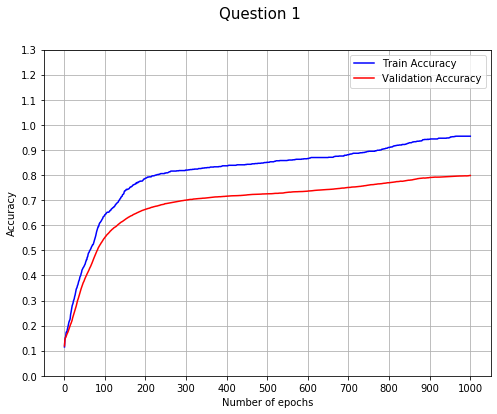

In [11]:
# %matplotlib inline

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
fig.suptitle('Question 1', fontsize=15)
ax1.plot(x1, train_accuracy, 'b-', x1, validation_accuracy, 'r-' )
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax1.set_xticks(np.arange(0, 1001, 100));
ax1.set_yticks(np.arange(0, 1.4, .1));
ax1.set_xlabel('Number of epochs');
ax1.set_ylabel('Accuracy');
ax1.grid(True);

#### Question 2 : Then, increase the training size to more training set (5000) and repeat what you did in the first part of the problem. What can you conclude about generalization as function of number of epochs and as function of training set size?

In [12]:
net2 = Network1([784, 30, 10])

In [13]:
start = time.time()

In [14]:
train_accuracy2, validation_accuracy2 = net2.SGD(training_data=training_data[0:5000], epochs=1000, mini_batch_size=100, eta=0.5, test_data=validation_data)

1000 epoch completed


In [15]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 1101.34 sec


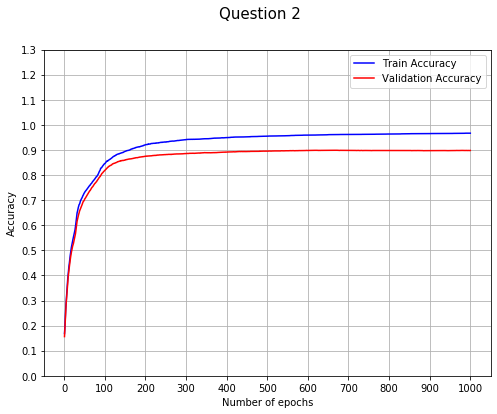

In [16]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
fig.suptitle('Question 2', fontsize=15)
ax1.plot(x1, train_accuracy2, 'b-', x1, validation_accuracy2, 'r-' )
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax1.set_xticks(np.arange(0, 1001, 100));
ax1.set_yticks(np.arange(0, 1.4, .1));
ax1.set_xlabel('Number of epochs');
ax1.set_ylabel('Accuracy');
ax1.grid(True)

**Answer:** With the training set size 1000, the validation accuracy score keeps improving while the 1000 epochs are completed, but, with the training set size 5000, the validation accuracy score stops improving (converges) quicker. with a larger training sample size per epoch, we can interate a smaller number of epochs to reach similiar accuracy scores.  

#### 8. Do not create a new Network object and do not renew net1, run your code for Question 1 (SGD fucntion) again and plot the accuracy of train set and validation set in one graph. Compared to the graph you plotted in Question 1, what do you find? Why?

In [17]:
start = time.time()

In [18]:
train_accuracy3, validation_accuracy3 = net1.SGD(training_data=training_data[0:1000], epochs=1000, mini_batch_size=100, eta=0.5, test_data=validation_data)

1000 epoch completed


In [19]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 416.96 sec


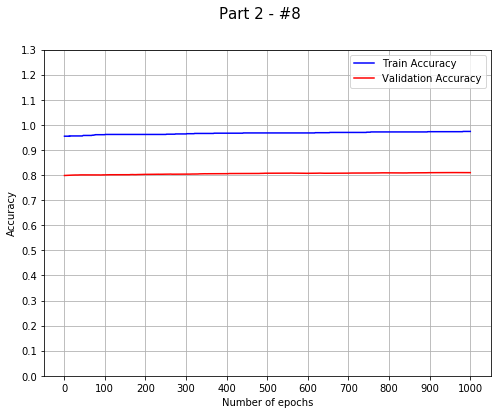

In [20]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
fig.suptitle('Part 2 - #8', fontsize=15)
ax1.plot(x1, train_accuracy3, 'b-', x1, validation_accuracy3, 'r-' )
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax1.set_xticks(np.arange(0, 1001, 100));
ax1.set_yticks(np.arange(0, 1.4, .1));
ax1.set_xlabel('Number of epochs');
ax1.set_ylabel('Accuracy');
ax1.grid(True)

**Answer:** the operation completed here is to provide the model with additional training samples to keep training the model; therefore, the validation accuracy score stops improving (converges) from the 100th epochs or even before that.

## Part 3 : Effect of mini-batch size 

#### Question 3 : All other paramters remains (epoch 1000, training set size 1000), only change mini-batch size here. Plot the graph as previous question when mini-batch size is 10, 200 respectively. Compared to the graph you plotted in problem 1, what can you find? Can you explain it?
#### Question 4 : Report running time of each case above. What can you find? If the result does not match your expectation, can you explain the reason?

In [57]:
net3 = Network1([784, 30, 10])
net4 = Network1([784, 30, 10])

In [58]:
start = time.time()

In [59]:
#batch size = 10
train_accuracy4, validation_accuracy4 = net3.SGD(training_data=training_data[0:1000], epochs=1000, mini_batch_size=10, eta=0.5, test_data=validation_data)

1000 epoch completed


In [60]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 409.13 sec


In [61]:
start = time.time()

In [62]:
#batch size = 200
train_accuracy5, validation_accuracy5 = net4.SGD(training_data=training_data[0:1000], epochs=1000, mini_batch_size=200, eta=0.5, test_data=validation_data)

1000 epoch completed


In [63]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 400.90 sec


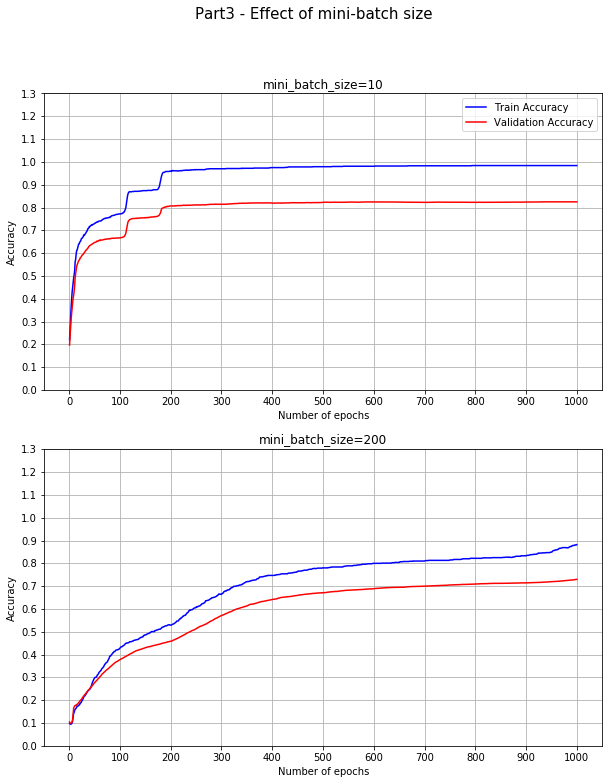

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
fig.suptitle('Part3 - Effect of mini-batch size', fontsize=15)
ax1.set_title('mini_batch_size=10')
ax1.plot(x1, train_accuracy4, 'b-', x1, validation_accuracy4, 'r-' )
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax1.set_xticks(np.arange(0, 1001, 100));
ax1.set_yticks(np.arange(0, 1.4, .1));
ax1.set_xlabel('Number of epochs');
ax1.set_ylabel('Accuracy');
ax1.grid(True)
ax2.set_title('mini_batch_size=200')
ax2.plot(x1, train_accuracy5, 'b-', x1, validation_accuracy5, 'r-' )
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax2.set_xticks(np.arange(0, 1001, 100));
ax2.set_yticks(np.arange(0, 1.4, .1));
ax2.set_xlabel('Number of epochs');
ax2.set_ylabel('Accuracy');
ax2.grid(True)

**Answer:** In terms of the number of epochs, the batch size 10 shows a faster convergence than the batch size 200; however, for the total of 1000 epochs the batch size 10 took longer than the batch size 200 because the batch size 10 means 100 iterations to complete 1 epoch and at the end of every batch the weights are updated. Therefore, a smaller batch size takes longer in terms of time if the operation is performed for the same number of epochs.

## Part 4 : Effect of learning rate

#### Question 5 : Set parameters as (epoch 100, training set size 1000, mini-batch size 100). Plot the graph when learning rate is  10, 20, 30. What can you conclude from it? Can you explain it? 

In [29]:

"""
network.py
~~~~~~~~~~

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""
class Network2(object):
 
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        train_set_accuracy = [];
        validation_set_accuracy = []
        
        if test_data: n_test = len(test_data)
        n = len(training_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            # My answer : from 50 to 100
            if test_data:
                #if (j % 10 == 9): #9th, 19th, 29th, ... 
                #Ask the TA if I need to test validation set after every epoch for this part
                train_set_accuracy.append(self.evaluate(training_data))
                validation_set_accuracy.append(self.evaluate(test_data))
                #print ("Epoch {0}: {1} / {2}".format(
                #    j, self.evaluate(test_data), n_test))
            
            if j == (epochs - 1):
                print (str(j + 1), 'epoch completed')
                    
        return train_set_accuracy, validation_set_accuracy 

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        try:
            test_results = []
            test_results = [(np.argmax(self.feedforward(x)), y) 
                            for (x, y) in test_data]
            return sum(int(x == y) for (x, y) in test_results) / len(test_data)
        
        except Exception:
            test_results = []
            test_results = [(np.argmax(self.feedforward(x)), np.argmax(y)) 
                            for (x, y) in test_data]
            
            return sum(int(x == y) for (x, y) in test_results) / len(test_data)
            

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations-y

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [30]:
net5 = Network2([784, 30, 10])
net6 = Network2([784, 30, 10])
net7 = Network2([784, 30, 10])

In [31]:
start = time.time()

In [32]:
train_accuracy6, validation_accuracy6 = net5.SGD(training_data=training_data[0:1000], epochs=100, mini_batch_size=100, eta=10, test_data=validation_data)

100 epoch completed


In [33]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 43.27 sec


In [34]:
start = time.time()

In [35]:
train_accuracy7, validation_accuracy7 = net6.SGD(training_data=training_data[0:1000], epochs=100, mini_batch_size=100, eta=20, test_data=validation_data)

100 epoch completed


In [36]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 45.10 sec


In [37]:
start = time.time()

In [38]:
train_accuracy8, validation_accuracy8 = net7.SGD(training_data=training_data[0:1000], epochs=100, mini_batch_size=100, eta=30, test_data=validation_data)

100 epoch completed


In [39]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 44.20 sec


In [40]:
x2 = np.arange(1, 101)
x2_tick = np.arange(0, 101, 10)

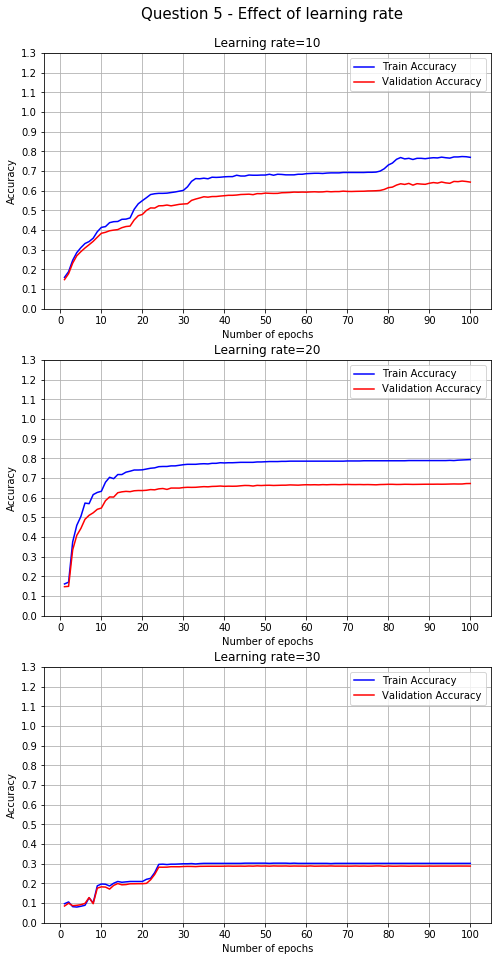

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 16));
fig.suptitle('Question 5 - Effect of learning rate', x=0.52, y=0.92, fontsize=15);
ax1.set_title('Learning rate=10');
ax1.plot(x2, train_accuracy6, 'b-', x2, validation_accuracy6, 'r-' );
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax1.set_xticks(x2_tick);
ax1.set_yticks(np.arange(0, 1.4, .1));
ax1.set_xlabel('Number of epochs');
ax1.set_ylabel('Accuracy');
ax1.grid(True)
ax2.set_title('Learning rate=20');
ax2.plot(x2, train_accuracy7, 'b-', x2, validation_accuracy7, 'r-' );
ax2.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax2.set_xticks(x2_tick);
ax2.set_yticks(np.arange(0, 1.4, .1));
ax2.set_xlabel('Number of epochs');
ax2.set_ylabel('Accuracy');
ax2.grid(True)
ax3.set_title('Learning rate=30');
ax3.plot(x2, train_accuracy8, 'b-', x2, validation_accuracy8, 'r-' );
ax3.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax3.set_xticks(x2_tick);
ax3.set_yticks(np.arange(0, 1.4, .1));
ax3.set_xlabel('Number of epochs');
ax3.set_ylabel('Accuracy');
ax3.grid(True)

**Answer:** The graph shows that the learning rate 10 doesn't learn fast enough to converge within 100 epochs, but the learning rate 20 seems to have reached convergence faster than the learning rate 10. However, the learning rate 30 seems to have diverged because the each step for updating weights had been probably too large.

In [42]:
"""
network.py
~~~~~~~~~~

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""
class Network3(object):
 
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None, method=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        train_set_accuracy = [];
        validation_set_accuracy = []
        
        if test_data: n_test = len(test_data)
        n = len(training_data)
        
        for j in range(epochs):
            if method == 1:
                eta = eta - 0.01;
            elif method == 2:
                eta = eta / np.sqrt(j+1);
            else:
                print('not updating eta')
            
            #print(eta)
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            # My answer : from 50 to 100
            if test_data:
                train_set_accuracy.append(self.evaluate(training_data))
                validation_set_accuracy.append(self.evaluate(test_data))
                #print ("Epoch {0}: {1} / {2}".format(
                #    j, self.evaluate(test_data), n_test))
            
            if j == (epochs - 1):
                print (str(j + 1), 'epoch completed')
   
        return train_set_accuracy, validation_set_accuracy 

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        try:
            test_results = []
            test_results = [(np.argmax(self.feedforward(x)), y) 
                            for (x, y) in test_data]
            return sum(int(x == y) for (x, y) in test_results) / len(test_data)
        
        except Exception:
            test_results = []
            test_results = [(np.argmax(self.feedforward(x)), np.argmax(y)) 
                           for (x, y) in test_data]
            return sum(int(x == y) for (x, y) in test_results) / len(test_data)
            

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations-y

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

#### Question 6 : People usually use learning rate decay to get both fast speed and high accuracy. Set parameters as (epoch 100, training set size 1000, mini-batch size 100). Here we set learning rate as 30. We use two methods to decay learning rate. 

#### Method 1 : Decay 0.01 in one epoch (First one is 29.99, Second one is 29.98...)
#### Method 2 : Divide by $\sqrt N$ at each epoch (First one is 30/sqrt(1), Second one is 30/sqrt(2)...)

#### Revise Network and plot the graph as previous question and report the running time of each case, what can you conclude? Can you explain why?

In [43]:
net8 = Network3([784, 30, 10])
net9 = Network3([784, 30, 10])

In [44]:
start = time.time()

In [45]:
#method 1
train_accuracy9, validation_accuracy9 = net8.SGD(training_data=training_data[0:1000], epochs=100, mini_batch_size=100, eta=30, test_data=validation_data, method=1)

100 epoch completed


In [46]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 41.30 sec


In [47]:
start = time.time()

In [48]:
#method 2
train_accuracy10, validation_accuracy10 = net9.SGD(training_data=training_data[0:1000], epochs=100, mini_batch_size=100, eta=30, test_data=validation_data, method=2)

100 epoch completed


In [49]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 41.92 sec


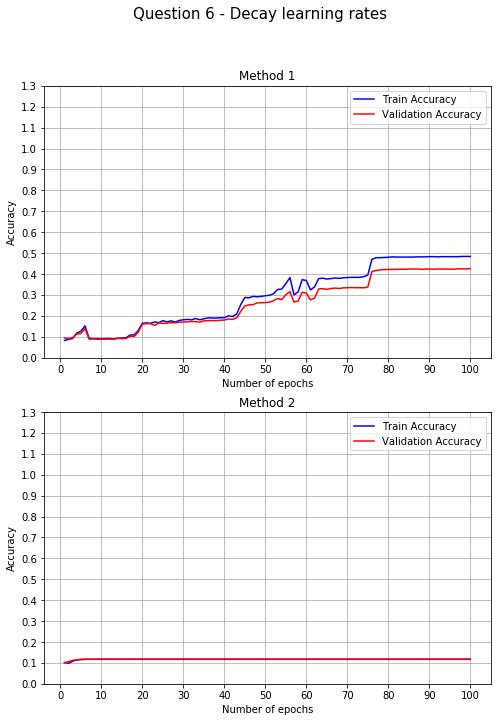

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 11))
fig.suptitle('Question 6 - Decay learning rates', fontsize=15)
ax1.set_title('Method 1')
ax1.plot(x2, train_accuracy9, 'b-', x2, validation_accuracy9, 'r-')
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax1.set_xticks(x2_tick);
ax1.set_yticks(np.arange(0, 1.4, .1));
ax1.set_xlabel('Number of epochs');
ax1.set_ylabel('Accuracy');
ax1.grid(True)
ax2.set_title('Method 2')
ax2.plot(x2, train_accuracy10, 'b-', x2, validation_accuracy10, 'r-' )
ax2.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax2.set_xticks(x2_tick);
ax2.set_yticks(np.arange(0, 1.4, .1));
ax2.set_xlabel('Number of epochs');
ax2.set_ylabel('Accuracy');
ax2.grid(True)

**Answer:** Method 1 seems to have too small decay learning rate (-0.01 after each epoch) because as seen in Question 5 the learning rate 30 is too large and, as a result, it diverges; it needed a larger, and the decay learning rate 0.01 wasn't large enough to correct for that problem in 100 epochs. Method 2 seems to have too large decay learning rate (divide by sqrt(N)) the learning rate vanish too quickly from very too high learning rate (30) to asymptotic zero: (30, 21.21, 12.25, 6.12, 2.73, 1.18, 0.42, 0.15, 0.05 ...) the learning rate vanishes by the 10th epoch, interfering the learning process.   

## Part 5 : Play with Network Parameters

#### Question 7 : Change Network Parameters and to see what happens. Try (784,3,10) and (784, 300, 10). Plot the graph as previous questions. What can you conclude? 

I will train the Network1 (used for Question 1) and compare the results with the outputs from Question 1.

In [84]:
net10 = Network1([784, 3, 10])
net11 = Network1([784, 300, 10])

In [85]:
start = time.time()

In [86]:
train_accuracy11, validation_accuracy11 = net10.SGD(training_data=training_data[0:1000], epochs=1000, mini_batch_size=100, eta=0.5, test_data=validation_data)

1000 epoch completed


In [87]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 168.22 sec


In [88]:
start = time.time()

In [89]:
train_accuracy12, validation_accuracy12 = net11.SGD(training_data=training_data[0:1000], epochs=1000, mini_batch_size=100, eta=0.5, test_data=validation_data)

1000 epoch completed


In [90]:
end = time.time()
print("Runtime:", "{0:.2f}".format((end - start)), 'sec')

Runtime: 3637.17 sec


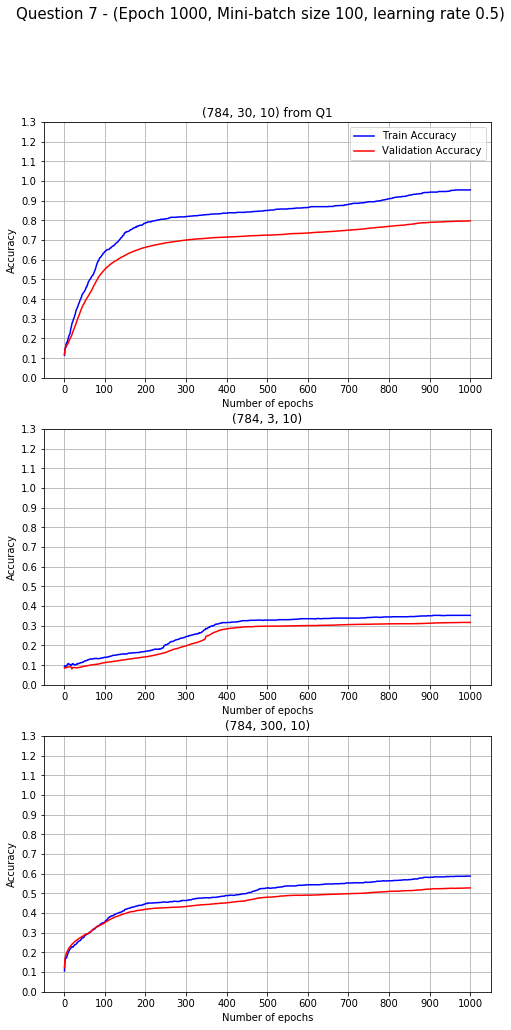

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))
fig.suptitle('Question 7 - (Epoch 1000, Mini-batch size 100, learning rate 0.5)', fontsize=15)
ax1.set_title('(784, 30, 10) from Q1')
ax1.plot(x1, train_accuracy, 'b-', x1, validation_accuracy, 'r-')
ax1.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
ax1.set_xticks(np.arange(0, 1001, 100)  );
ax1.set_yticks(np.arange(0, 1.4, .1));
ax1.set_xlabel('Number of epochs');
ax1.set_ylabel('Accuracy');
ax1.grid(True)
ax2.set_title('(784, 3, 10)')
ax2.plot(x1, train_accuracy11, 'b-', x1, validation_accuracy11, 'r-' )
ax2.set_xticks(np.arange(0, 1001, 100));
ax2.set_yticks(np.arange(0, 1.4, .1));
ax2.set_xlabel('Number of epochs');
ax2.set_ylabel('Accuracy');
ax2.grid(True)
ax3.set_title('(784, 300, 10)')
ax3.plot(x1, train_accuracy12, 'b-', x1, validation_accuracy12, 'r-' )
ax3.set_xticks(np.arange(0, 1001, 100));
ax3.set_yticks(np.arange(0, 1.4, .1));
ax3.set_xlabel('Number of epochs');
ax3.set_ylabel('Accuracy');
ax3.grid(True)

**Answer:** With (784, 3, 10), the 3 neurons at the second layer seem to be unable to capture (and carry) complex associations (dissimilarities) among independent variables (features) to produce accurate predictions. With (784, 300, 10), 300 neurons (the influence of each weight becomes very small) at the second layer seem to make gradient vanish during the back propagation process, so the network model can't learn to update the model (parameters) to produce better accuracy than the model with 30 neurons at the second layer despite the siginificantly longer time it took.